In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 5                #number of agents
N_buckets = 50              #number of buckets
max_turns = 20             #max number of moves in single game
sabotage_buckets = True     #sabaotage some buckets when true
rn_seed = 15                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents, sabotage_buckets=sabotage_buckets)
print 'environment = ', environment

environment =  {'sabotage_buckets': True, 'max_turns': 20, 'N_agents': 5, 'rn_seed': 15, 'N_buckets': 50, 'bucket_params': {'p0': array([ 0.        ,  0.00040816,  0.00081633,  0.00122449,  0.00163265,
        0.00204082,  0.00244898,  0.00285714,  0.00326531,  0.00367347,
        0.00408163,  0.0044898 ,  0.00489796,  0.00530612,  0.00571429,
        0.00612245,  0.00653061,  0.00693878,  0.00734694,  0.0077551 ,
        0.00816327,  0.00857143,  0.00897959,  0.00938776,  0.00979592,
        0.01020408,  0.01061224,  0.01102041,  0.01142857,  0.01183673,
        0.0122449 ,  0.01265306,  0.01306122, -0.02020408, -0.02081633,
       -0.02142857, -0.02204082, -0.02265306,  0.0155102 ,  0.01591837,
        0.01632653,  0.01673469,  0.01714286,  0.01755102,  0.01795918,
        0.01836735,  0.01877551,  0.01918367,  0.01959184,  0.02      ]), 'sigma': array([ 0.        ,  0.00061224,  0.00122449,  0.00183673,  0.00244898,
        0.00306122,  0.00367347,  0.00428571,  0.00489796,  0.00551

In [6]:
#initialize state
state = initialize_state(environment)
print 'state = ', state

state =  {'agent_value': array([ 1.,  1.,  1.,  1.,  1.]), 'previous_bucket_productivity': array([ 0.        ,  0.0005588 ,  0.00023186,  0.00263804,  0.00289116,
        0.00391479,  0.0032402 ,  0.00128025,  0.0081479 , -0.00470955,
        0.01440619,  0.01109035,  0.01062686,  0.01515226, -0.00501131,
        0.00225918,  0.00542317,  0.00893565, -0.00287194,  0.00072029,
        0.0262081 ,  0.00825609,  0.00348405, -0.000823  , -0.00255223,
        0.00465586,  0.01018096,  0.01952751,  0.02841102,  0.02352094,
        0.02618754, -0.01683739, -0.00727022,  0.00949443,  0.00066035,
       -0.03254667, -0.00980492,  0.01041241,  0.0292179 , -0.03099857,
       -0.02352357,  0.04102143,  0.05533136,  0.0349678 ,  0.05438015,
        0.00851816, -0.00863634,  0.04678907,  0.03194823,  0.04106397]), 'agent_locations': array([ 2, 30, 37, 36,  1]), 'bucket_productivity': array([  0.00000000e+00,  -3.94774410e-05,   6.87352505e-04,
        -1.86006475e-03,   2.64870720e-03,  -1.43795316

In [7]:
#move an agent
agent = 1
action = 2
state_next = update_agents(state, agent, action, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state_next =  {'agent_value': array([ 1.00068735,  1.00068735,  0.96848128,  0.98297849,  0.99996052]), 'previous_bucket_productivity': array([  0.00000000e+00,  -3.94774410e-05,   6.87352505e-04,
        -1.86006475e-03,   2.64870720e-03,  -1.43795316e-03,
         8.58076540e-03,   4.02738773e-03,   1.86912345e-03,
        -6.67443048e-04,   3.94740812e-03,   1.91336113e-04,
         1.84107277e-02,   1.27782335e-02,  -1.47418087e-04,
         1.38094815e-02,   2.03065273e-03,   2.43216824e-02,
        -8.82597525e-03,   1.61704535e-02,   1.86474641e-02,
        -3.61031900e-03,  -8.14111993e-03,  -6.29850754e-03,
         2.41065290e-03,   2.41241071e-02,   6.47436174e-03,
         1.64059413e-02,   1.74391232e-03,   3.15650214e-02,
        -2.10406836e-02,  -1.21225590e-02,   1.96416364e-02,
        -7.27204953e-03,  -7.34594661e-03,   9.29497557e-03,
        -1.70215068e-02,  -3.15187224e-02,   1.17991564e-02,
        -1.72390640e-02,   2.91948848e-02,  -7.24731404e-03,
         9

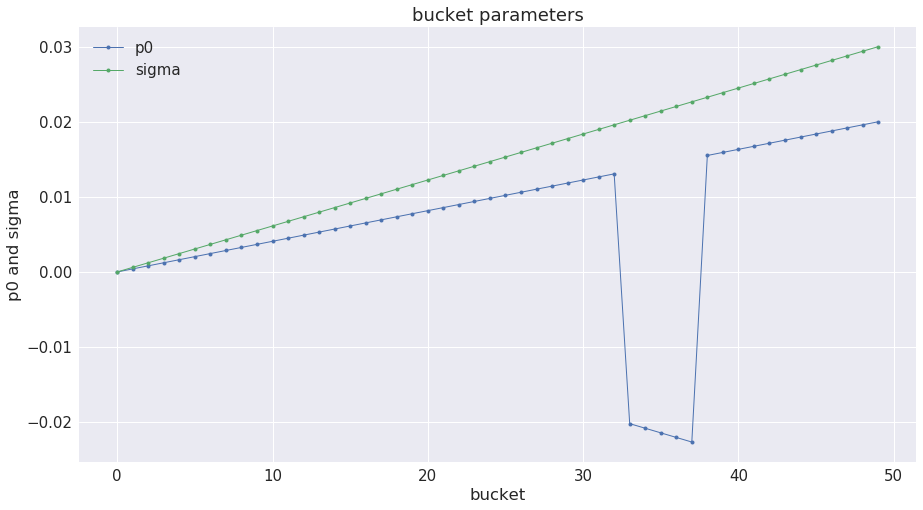

In [8]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='sigma')
p = ax.legend()

In [9]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  21


,turn,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4
0,0,29,5.005862,0.999972,1.006004,1.000000,0.999972,0.999914
1,1,37,5.038792,1.019842,0.997492,1.000000,1.019842,1.001617
2,2,42,5.161010,1.055244,0.995027,1.054167,1.055244,1.001328
3,3,21,5.141545,1.031862,1.004531,1.051393,1.052511,1.001248
4,4,44,5.213989,1.019050,1.006273,1.062731,1.075603,1.050332


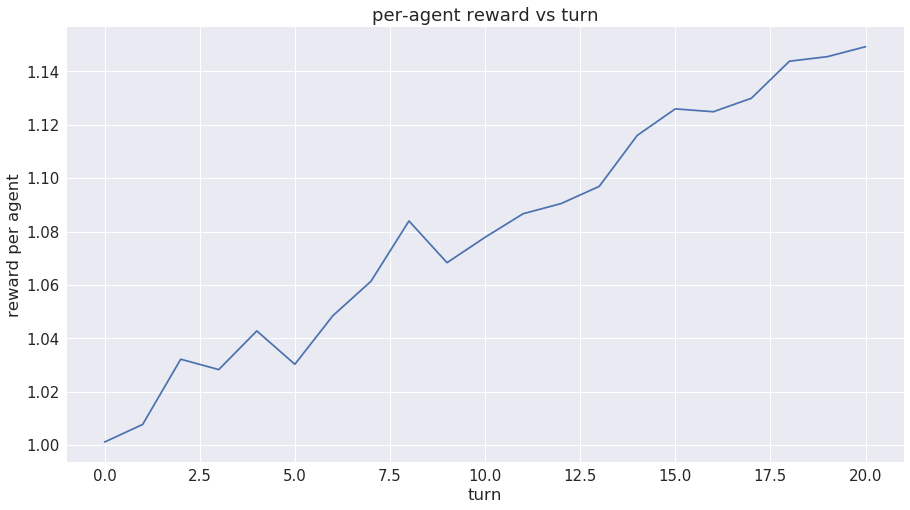

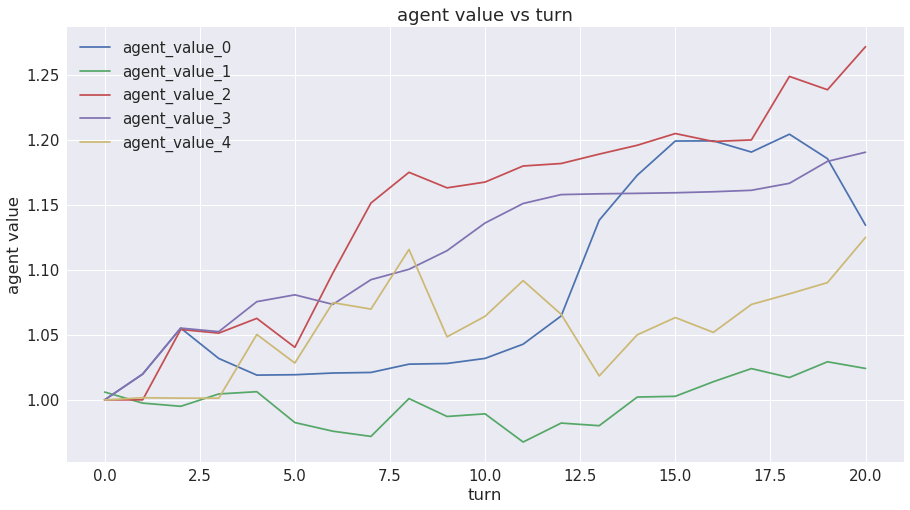

In [10]:
#plot per-agent reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

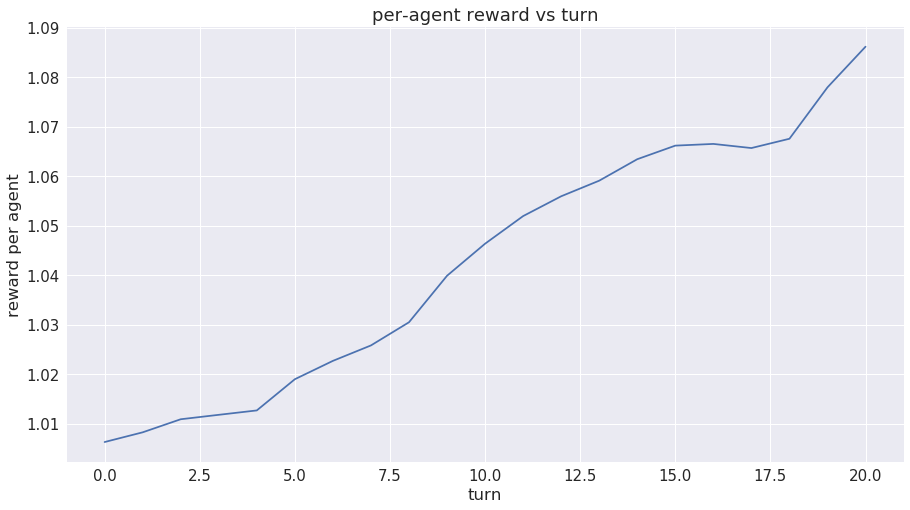

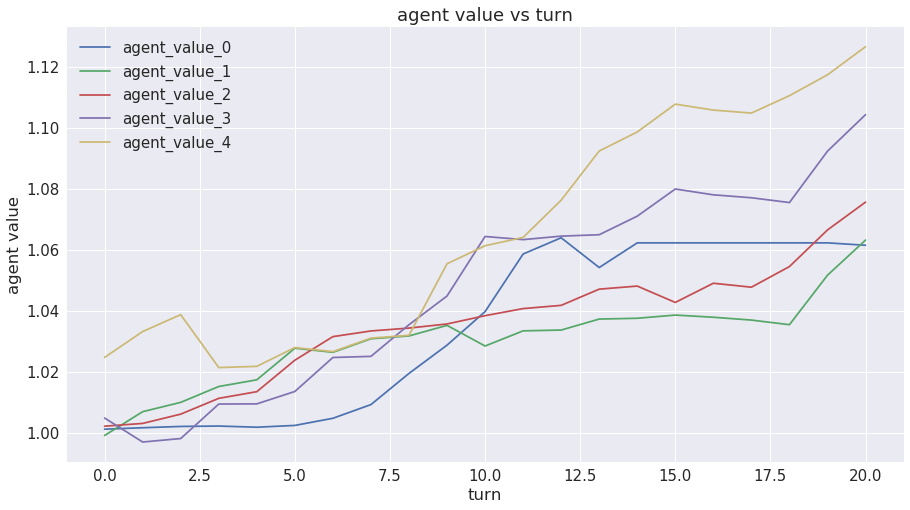

In [11]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

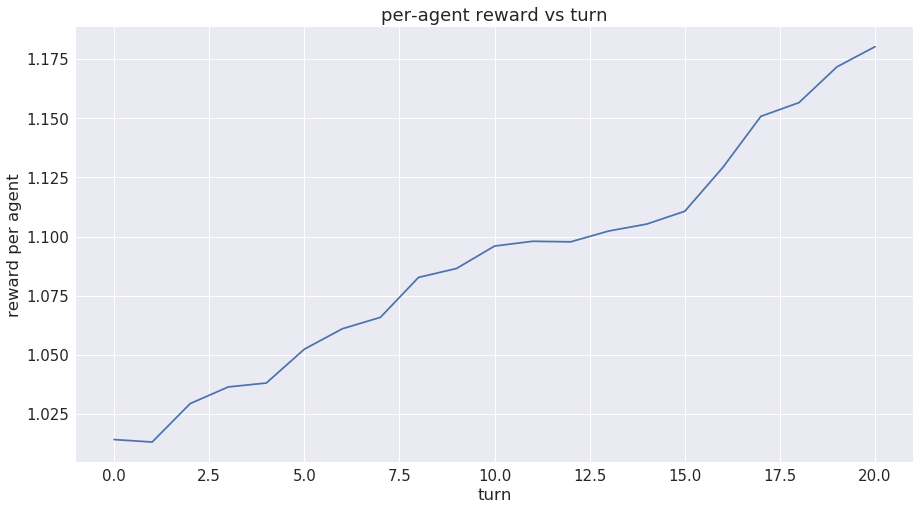

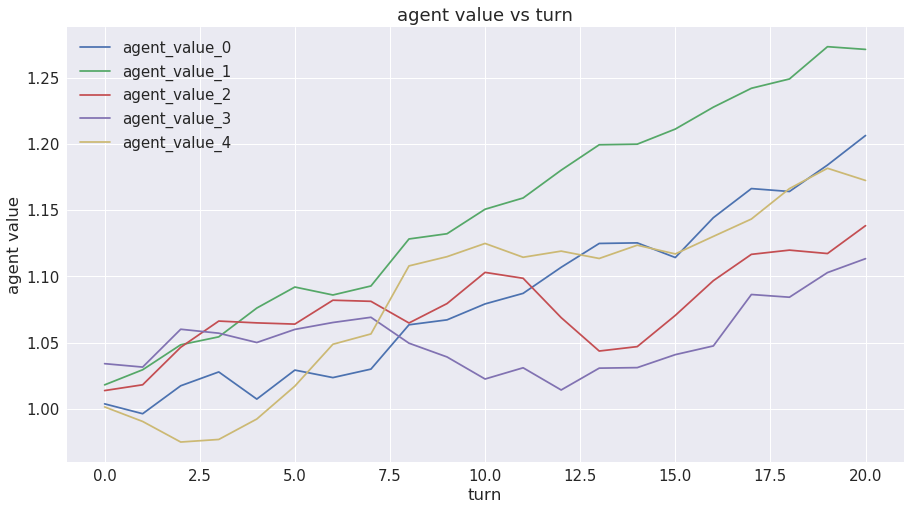

In [12]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

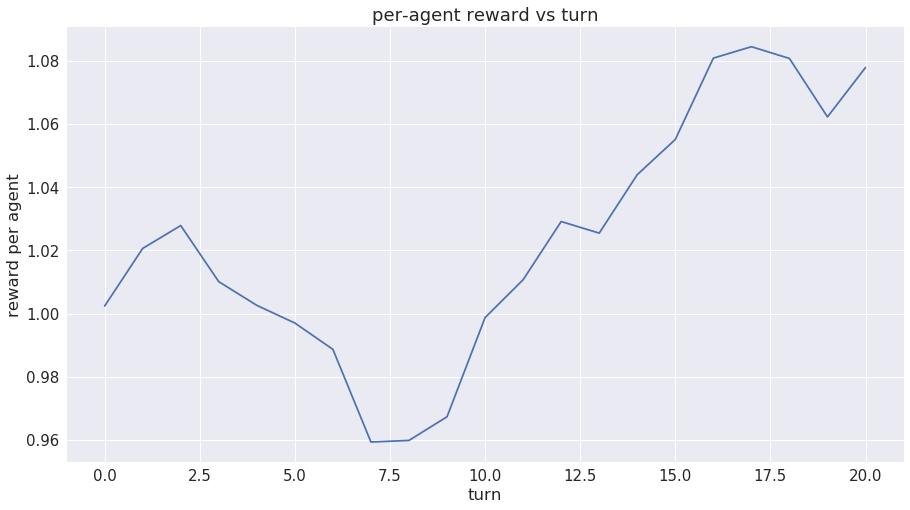

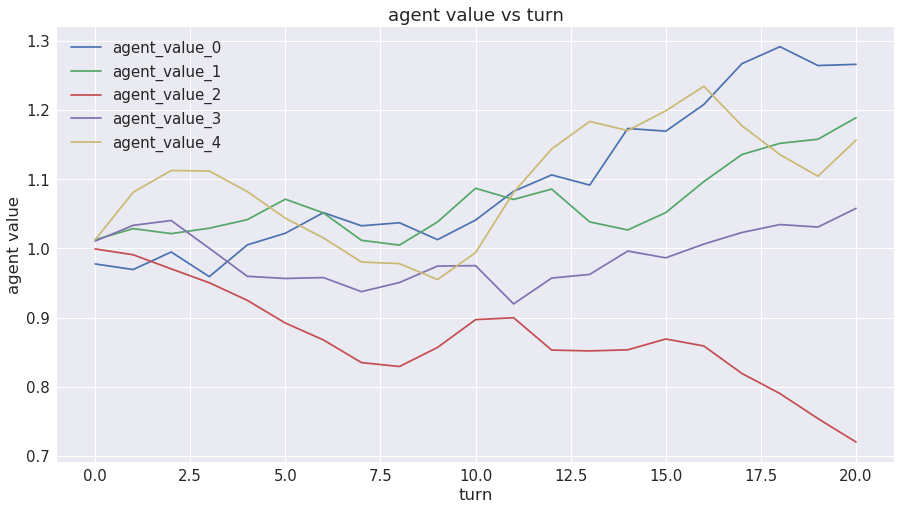

In [13]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [25]:
#play 20 games using various strategies, and generate stats for each strategy
N_games = 100
strategies = ['low', 'middle', 'random', 'high']#, 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  random
strategy =  high


mean       std
strategy turn                    
random   16    5.601754  0.030365
         17    5.638928  0.031028
         18    5.675210  0.031457
         19    5.704184  0.031989
         20    5.730214  0.032962

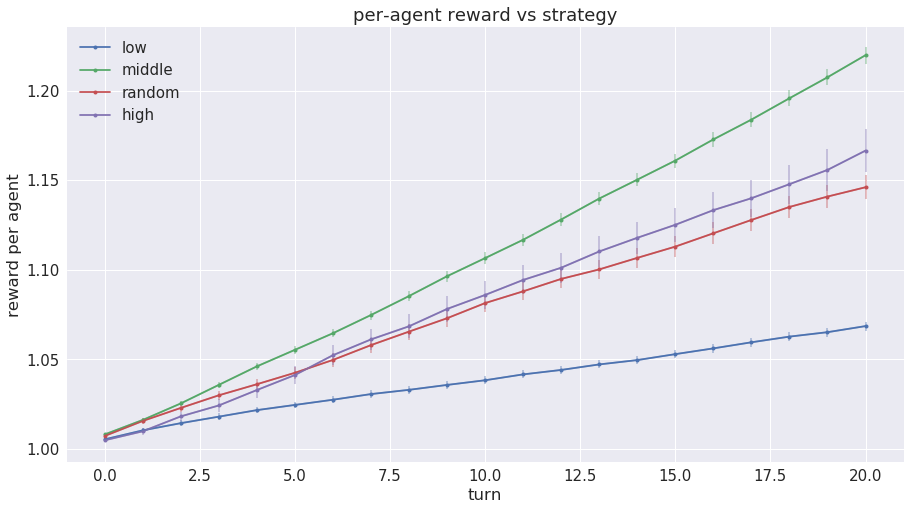

In [26]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [16]:
#play 200 random games and store moves in memories queue
N_games = 100                  #set=0.1*N_training_games*batch_size/max_turns
strategy = 'random'
memories_list = []
N_memories = 0
for N_game in range(N_games):
    memories = play_game(environment, strategy)
    memories_list += [memories]
    N_memories += len(memories)
memories = deque(maxlen=N_memories)
for game_memories in memories_list:
    for m in game_memories:
        memories.append(m)
print 'number of memories = ', len(memories)

number of memories =  2100


In [17]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = 10*N_buckets
model = build_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  5
N_buckets =  50
N_inputs =  105
N_neurons =  500
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               53000     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                12550     
Total params: 190,800
Trainable params: 190,800
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#train model
N_training_games = 1000                     #number of games played during training
N_validation_games = 10                   #number of smart games played after each training game
gamma = 0.85                               #discount for future rewards
batch_size = 20*max_turns                            #number of memories used during experience-replay
debug = False                              #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print '0.1*N_training_games*batch_size/max_turns', 0.1*N_training_games*batch_size/max_turns
print 'training model'
trained_model, games, epsilons, mean_validation_reward = \
    train(environment, model, N_training_games, N_validation_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  400
0.1*N_training_games*batch_size/max_turns 2000.0
training model
.

/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... 

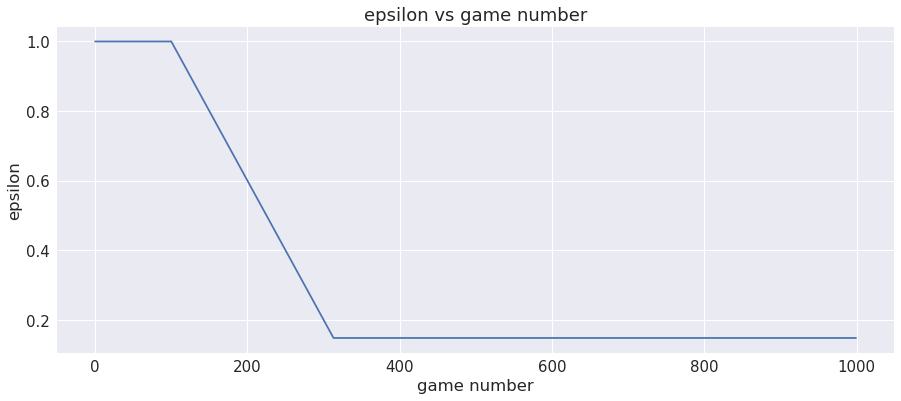

In [19]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

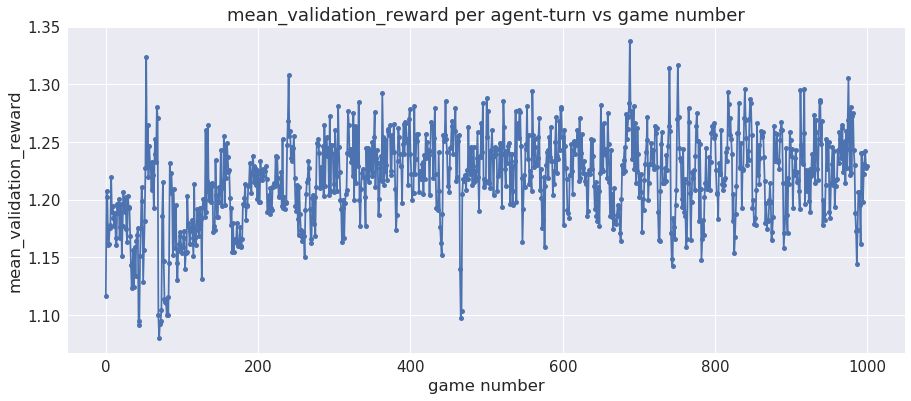

In [20]:
#plot median_validation_rewards vs validation game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = mean_validation_reward/N_agents/max_turns
p = ax.plot(yp, marker='o', linestyle='-', markersize=5)
p = ax.set_title('mean_validation_reward per agent-turn vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('mean_validation_reward')

In [21]:
#stop-notebook

array([27, 44, 44, 44, 44, 44, 27, 43, 43, 44])

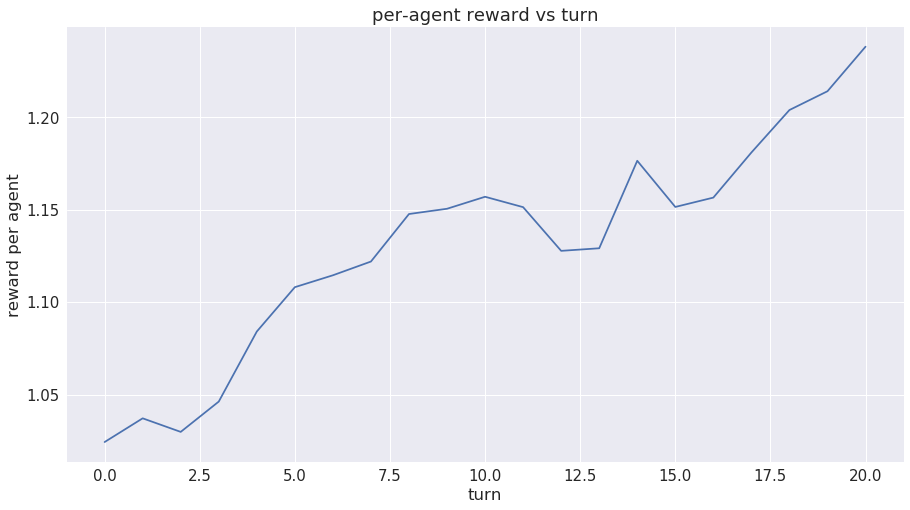

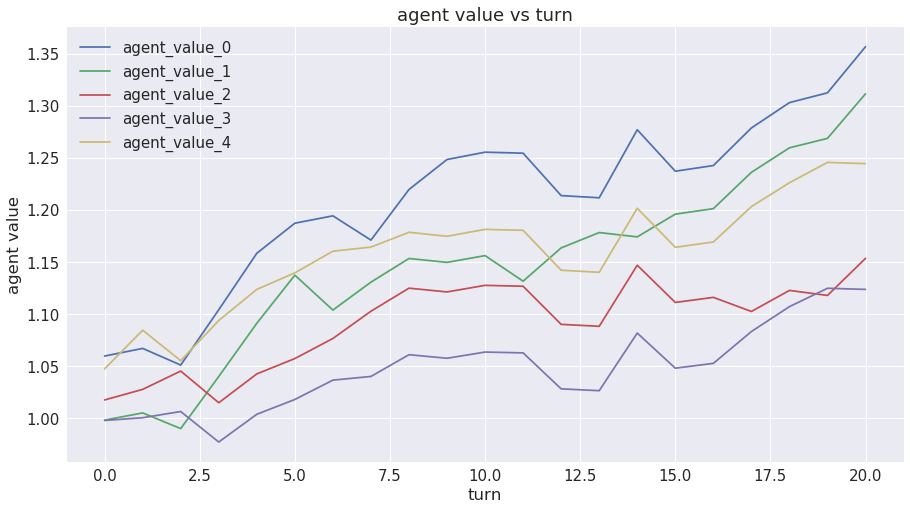

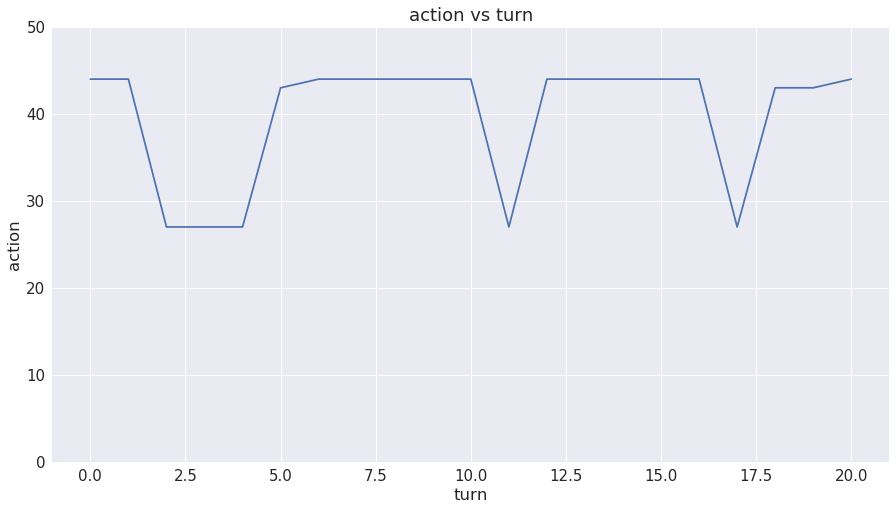

In [22]:
#play smart game using trained model to select best action
strategy = 'smart'
memories = play_game(environment, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()
#plot action vs turn
xp = df['turn']
yp = df['action']
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('action vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('action')
p = ax.set_ylim(0, N_buckets)
p = ax.plot(xp, yp)
yp.values[-10:]

strategy =  low
strategy =  middle
strategy =  high
strategy =  smart
strategy =  best


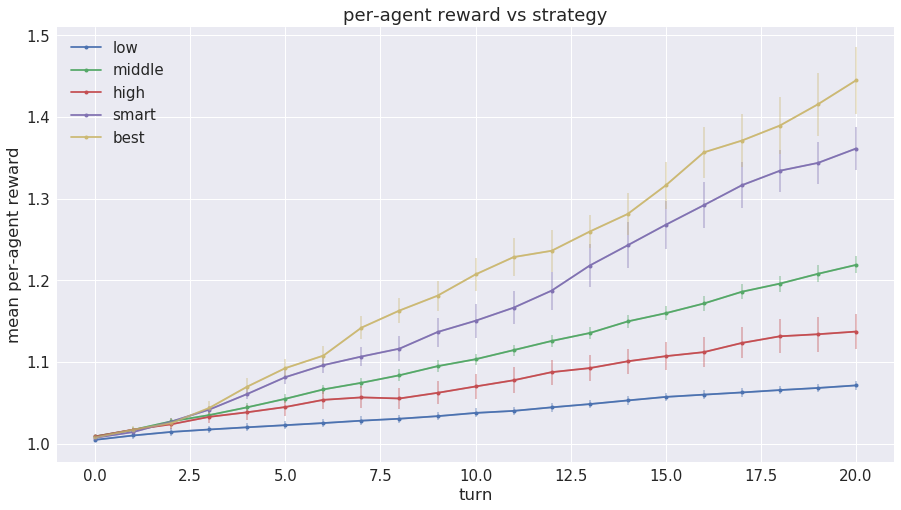

In [23]:
#play 10 games using various strategies and plot outcomes
N_games = 20
strategies = ['low', 'middle', 'high', 'smart', 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy, model=model)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [24]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  4.97932336728
